## Text Analysis of Top 4 Google Play Yoga and Meditation Apps

Read the file and see what is inside for the first 5 lines. 

In [1]:
import pandas as pd

reviews = pd.read_csv('TopAppReviews.csv')
reviews.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,"Fabulous: Motivate Me! Meditate, Relax, Sleep",I used year ago hated it. I changed since I fi...,Negative,-0.07381,0.730952
1,"Fabulous: Motivate Me! Meditate, Relax, Sleep",I used set alarm phone remind drink water I wo...,Negative,-0.05000,0.550000
2,"Calm - Meditate, Sleep, Relax","Amazing! I trouble starting practice own, I lo...",Positive,0.28750,0.550000
3,"Calm - Meditate, Sleep, Relax",In short time helped focus mindfulness. I appr...,Positive,0.38125,0.825000
4,"Calm - Meditate, Sleep, Relax",In short time helped focus mindfulness. I appr...,Positive,0.38125,0.825000


Making the string to lower case and removing punctuation is the first step for pre-processing the text data. 

In [2]:
# Make the string lower case

reviews['Translated_Review'] = reviews['Translated_Review'].str.lower()

# Remove punctuation
reviews['Translated_Review'] = reviews['Translated_Review'].str.replace('[^\w\s]','')

reviews.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,"Fabulous: Motivate Me! Meditate, Relax, Sleep",i used year ago hated it i changed since i fin...,Negative,-0.07381,0.730952
1,"Fabulous: Motivate Me! Meditate, Relax, Sleep",i used set alarm phone remind drink water i wo...,Negative,-0.05000,0.550000
2,"Calm - Meditate, Sleep, Relax",amazing i trouble starting practice own i look...,Positive,0.28750,0.550000
3,"Calm - Meditate, Sleep, Relax",in short time helped focus mindfulness i appre...,Positive,0.38125,0.825000
4,"Calm - Meditate, Sleep, Relax",in short time helped focus mindfulness i appre...,Positive,0.38125,0.825000


Now, remove the stop words.


In [3]:
reviews_nostop = reviews.copy()

In [4]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop = stopwords.words('english')
reviews_nostop['Translated_Review'] = reviews_nostop['Translated_Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

reviews_nostop.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lizawood/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,"Fabulous: Motivate Me! Meditate, Relax, Sleep",used year ago hated changed since find super h...,Negative,-0.07381,0.730952
1,"Fabulous: Motivate Me! Meditate, Relax, Sleep",used set alarm phone remind drink water would ...,Negative,-0.05000,0.550000
2,"Calm - Meditate, Sleep, Relax",amazing trouble starting practice look forward,Positive,0.28750,0.550000
3,"Calm - Meditate, Sleep, Relax",short time helped focus mindfulness appreciate...,Positive,0.38125,0.825000
4,"Calm - Meditate, Sleep, Relax",short time helped focus mindfulness appreciate...,Positive,0.38125,0.825000


## Finding n-grams

n-gram means frequent sequences of n words that are occurring together. Below is a table showing 1-Grams, 2-Grams, 3-Grams, and 4-Grams and the number of occurrence in each. This table can be imported into Tableau for further visualization.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Using the reviews_nostop data frame created previously...

# Count the 1-grams
word_vectorizer1 = CountVectorizer(ngram_range=[1,1], analyzer='word')
sparse_matrix = word_vectorizer1.fit_transform(reviews_nostop['Translated_Review'])
frequencies = sum(sparse_matrix).toarray()[0]
one_grams = pd.DataFrame(frequencies, index=word_vectorizer1.get_feature_names(), columns=['frequency']).sort_values('frequency', ascending = False).reset_index()

one_grams.columns= ["1-Gram", "1-Gram Occurence"]


# Count the 2-grams
word_vectorizer2 = CountVectorizer(ngram_range=[2, 2], analyzer='word')
sparse_matrix = word_vectorizer2.fit_transform(reviews_nostop['Translated_Review'])
frequencies = sum(sparse_matrix).toarray()[0]
two_grams = pd.DataFrame(frequencies, index=word_vectorizer2.get_feature_names(), columns=['frequency']).sort_values('frequency', ascending = False).reset_index()

two_grams.columns= ["2-Gram", "2-Gram Occurence"]

# Count the 3-grams
word_vectorizer3 = CountVectorizer(ngram_range=[3, 3], analyzer='word')
sparse_matrix = word_vectorizer3.fit_transform(reviews_nostop['Translated_Review'])
frequencies = sum(sparse_matrix).toarray()[0]
three_grams = pd.DataFrame(frequencies, index=word_vectorizer3.get_feature_names(), columns=['frequency']).sort_values('frequency', ascending = False).reset_index()

three_grams.columns= ["3-Gram", "3-Gram Occurence"]

# Count the 4-grams
word_vectorizer4 = CountVectorizer(ngram_range=[4, 4], analyzer='word')
sparse_matrix = word_vectorizer4.fit_transform(reviews_nostop['Translated_Review'])
frequencies = sum(sparse_matrix).toarray()[0]
four_grams = pd.DataFrame(frequencies, index=word_vectorizer4.get_feature_names(), columns=['frequency']).sort_values('frequency', ascending = False).reset_index()

four_grams.columns= ["4-Gram", "4-Gram Occurence"]

# Put the above together in one table:

all_grams = [one_grams, two_grams, three_grams, four_grams]

review_grams = pd.concat(all_grams, axis=1, join='outer')

export_csv = review_grams.to_csv (r'review_grams.csv', index = None, header=True) 

review_grams.head(20)

,1-Gram,1-Gram Occurence,2-Gram,2-Gram Occurence,3-Gram,3-Gram Occurence,4-Gram,4-Gram Occurence
0,free,36.0,full review,13,every night go,4.0,first week helped greatly,2.0
1,meditation,34.0,love app,11,makes feel like,4.0,effortlessly takes minutes day,2.0
2,day,34.0,free version,9,drinking water wake,3.0,portrait finally landscape playing,2.0
3,app,33.0,healthy habits,7,focus mindfulness appreciate,2.0,even first week helped,2.0
4,like,30.0,every day,6,full full review,2.0,ive found keeps calm,2.0
5,really,30.0,makes feel,6,sleep chase away,2.0,especially people limited income,2.0
6,time,29.0,feel like,5,sleep app love,2.0,subscription calm charged 5999,2.0
7,love,26.0,really like,5,free version far,2.0,ive tried years without,2.0
8,great,24.0,free trial,5,simple wish price,2.0,playing night causing phone,2.0
9,im,21.0,every night,4,free version really,2.0,subscription id say 101,2.0


## WordCloud

Using **pillow** and **wordcloud** packages, we can generate a word cloud directly in Python

You can play with the coloring, fonts, even the shape of the cloud. There is a really good DataCamp article on it: https://www.datacamp.com/community/tutorials/wordcloud-python

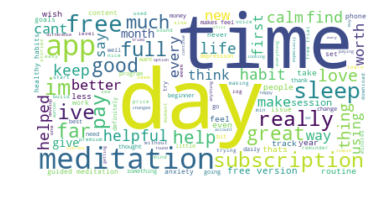

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Exporting the text with the stopwords removed and reading it back in as one continuous block of text.

cleanreviews = reviews_nostop.loc[:,'Translated_Review']
export_csv = cleanreviews.to_csv (r'cleanreviews.txt', index = None, header=False) 

text = ""
f = open('cleanreviews.txt')
for line in f:
    text = text + line.strip()

# Generate word cloud:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#save it to file: 
wordcloud.to_file("reviews.png")

### Frequency Distribution

You can show the frequency distribution of 1-grams. The simplest way is to install the **yellowbrick** package to visualize the frequency of the words in the data. Remember to remove the stop words. 

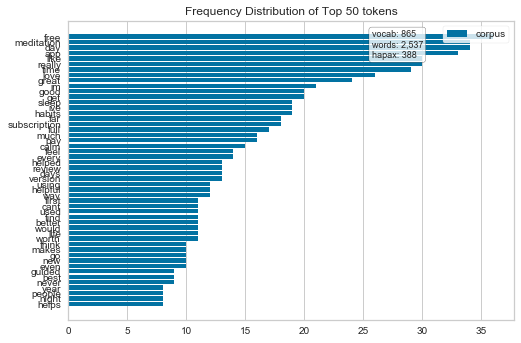

In [14]:
from yellowbrick.text import FreqDistVisualizer  #had to do some wrestling to get this to import!
from sklearn.feature_extraction.text import CountVectorizer

# Visualizing 'Translated_Review' in the data frame where the stop words were removed.

vectorizer = CountVectorizer()
#complete the following line: 
docs = vectorizer.fit_transform(reviews_nostop['Translated_Review'])
features = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()